**2023-01-12 `06-Python-APIs - Day 2 - Working with Weather & City APIs`**

**Objectives**

* Familiarize yourselves with API documentation effectively.
* Use data from the OpenWeatherMap and World Bank APIs.
* Load JSON from API responses into a Pandas DataFrame.
* Use `try`/`except` blocks to handle exceptions.

**Resources**
* [OpenWeatherMap API](https://openweathermap.org/api)
* [World Bank API](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information)
* [A list of API's](https://www.computersciencezone.org/50-most-useful-apis-for-developers/)
* [Another that is all public API's](https://github.com/public-apis/public-apis)
* [Exception tutorial](https://www.w3schools.com/python/python_try_except.asp)


**Presentation**
* [06.2 Working with Weather & City APIs](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/UCB-VIRT-DATA-PT-11-2022-U-LOLC/-/blob/main/slides/Data-06.2_Working_with_Weather&City_APIs.pdf)

**API Keys**

* `Register/sign-up`  for account in [OpenWeatherMap API](https://home.openweathermap.org/users/sign_up) and add your API KEY to your `config.py` file using:

```python
weather_api_key = "TYPE_YOUR_API_KEY_HERE"
```


Using the enviroment

* Create `.env` file in your `DataClass` folder

```python

# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")

```

# ==========================================

### 2.01 Students Do: JSON Traversal (10 min)

# JSON Traversal Review

This activity is an opportunity to practice loading and parsing JSON in Python.

## Instructions

* Load the provided JSON.

* Retrieve the video's title.

* Retrieve the video's rating.

* Retrieve the link to the video's first tag.

* Retrieve the number of views for the video.

## References

Data Source:
Data for this dataset was generated by edX Boot Camps LLC, and is intended for educational purposes only.

---

In [47]:
# Dependencies
import json
import os

# Load JSON
filepath = os.path.join("01-Stu_JSONTraversalReview", "Resources", "video_api_response.json")
with open(filepath) as jsonfile:
    video_json = json.load(jsonfile)


In [49]:
video_json["data"]

{'updated': '2021-06-07T12:00:00.000Z',
 'totalItems': 10,
 'startIndex': 1,
 'itemsPerPage': 1,
 'items': [{'id': '1234567890',
   'uploaded': '2021-06-05T12:00:00.000Z',
   'updated': '2021-06-07T12:00:00.000Z',
   'category': 'Educational',
   'title': 'Introduction to Python Programming',
   'description': 'This is the an introduction course to Python programming.',
   'tags': ['Python', 'Data', 'Coding'],
   'duration': 45,
   'aspectRatio': 'widescreen',
   'rating': 2.35,
   'ratingCount': 453,
   'viewCount': 1350,
   'favoriteCount': 21,
   'commentCount': 3}]}

In [54]:
# Isolate "data items" for easy reading
data = video_json["data"]
data_items = data["items"]

In [56]:
for item in data_items:
    print("Title: ", item["title"])
    print("Rating:", item["rating"])
    print("Tags: ", ", ".join(item["tags"]))
    print("View count: ", item["viewCount"])


Title:  Introduction to Python Programming
Rating: 2.35
Tags:  Python, Data, Coding
View count:  1350


In [50]:
# Retrieve the video's title
title = data_items[0]["title"]
print("Title: ", title)

Title:  Introduction to Python Programming


In [51]:
# Retrieve the video's rating
rating = data_items[0]["rating"]
print("Rating:", rating)

Rating: 2.35


In [52]:
# Retrieve the link to the video's first tag
tag_one = data_items[0]["tags"][0]
print("Tags: ", tag_one)

Tags:  Python


In [53]:
# Retrieve the number of views this video has
view_count = data_items[0]["viewCount"]
print(f"View count: {view_count}")

View count: 1350


# ==========================================

### 2.02 Students Do: Requests Review (10 min)

# Requests & Responses

This activity provides practice making requests, converting the response to JSON, and then manipulating the result with Python.

## Instructions

* Make a request to the following endpoint (<https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.1/06-Python-APIs/request_review.json>), and store the response.

* Print the JSON representations of the first and last posts.

* Print number of posts received.

## References

Data Source: Mockaroo, LLC. (2021). Realistic Data Generator. [https://www.mockaroo.com/](https://www.mockaroo.com/)

---

In [57]:
# Dependencies
import json
import requests 
from pprint import pprint

In [58]:
# Specify the URL
url = "https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.1/06-Python-APIs/request_review.json"

# Make request and store response
response = requests.get(url)

# Verify status code
response.status_code

200

In [59]:
# JSON-ify response
response_json = response.json()

In [60]:
# Print first and last articles
pprint(f"The first response is {response_json[0]}.")
pprint(f"The last response is {response_json[-1]}.")

("The first response is {'id': 1, 'common_name': 'Tiger cat', "
 "'scientific_name': 'Dasyurus maculatus', 'info': 'Curabitur at ipsum ac "
 'tellus semper interdum. Mauris ullamcorper purus sit amet nulla. Quisque '
 "arcu libero, rutrum ac, lobortis vel, dapibus at, diam.', 'location': "
 "'Russia'}.")
("The last response is {'id': 1000, 'common_name': 'Sloth, two-toed tree', "
 "'scientific_name': 'Choloepus hoffmani', 'info': 'Curabitur in libero ut "
 'massa volutpat convallis. Morbi odio odio, elementum eu, interdum eu, '
 'tincidunt in, leo. Maecenas pulvinar lobortis est.\\n\\nPhasellus sit amet '
 "erat. Nulla tempus. Vivamus in felis eu sapien cursus vestibulum.', "
 "'location': 'United States'}.")


In [61]:
print(f"We received {len(response_json)} responses.")

We received 1000 responses.


# ==========================================

### 2.03 Instructor Do: OpenWeatherMap API (10 min)

### Note: Don't forget to change the API key

* We'll work with [OpenWeatherMap API](https://openweathermap.org/api), which provides various sorts of meteorological data for developers to use.

* Like the New York Times API, the OpenWeatherMap API requires users to [register](https://home.openweathermap.org/users/sign_up) for an API key.

  * Go to [sign-up](https://home.openweathermap.org/users/sign_up) and register to get your api key.

In [63]:
# Dependencies
import json
import requests
# from config import api_key

In [64]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")


In [65]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [68]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 280.96, 'feels_like': 276.64, 'temp_min': 280.07, 'temp_max': 281.63, 'pressure': 1001, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1673579153, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1673596874, 'sunset': 1673626584}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}.


In [69]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1673579153,
 'id': 2643743,
 'main': {'feels_like': 276.64,
          'humidity': 75,
          'pressure': 1001,
          'temp': 280.96,
          'temp_max': 281.63,
          'temp_min': 280.07},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1673596874,
         'sunset': 1673626584,
         'type': 2},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 9.26}}


In [72]:
# Another way :)
url = "http://api.openweathermap.org/data/2.5/weather"
req = {
    "appid": weather_api_key,
    "q": city,
}
weather_response = requests.get(query_url, params=req)
weather_response.json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 280.96,
  'feels_like': 276.64,
  'temp_min': 280.07,
  'temp_max': 281.63,
  'pressure': 1001,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 9.26, 'deg': 250},
 'clouds': {'all': 20},
 'dt': 1673579467,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1673596874,
  'sunset': 1673626584},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

# ==========================================

### 2.04 Students Do: Weather in Burundi (12 min)

# Weather in Bujumbura

This activity gives students practice with making API calls and handling responses.

## Instructions

* Save all of your "config" information—i.e., your API key; the base URL; etc.—before moving on.

* Build your query URL.

* **Hint:** Check the documentation to figure out how to request temperatures in Celsius.

* Make your request, and save the API response.

* Retrieve the current temperature in Bujumbura from the JSON response.

* Print the temperature to the console.

## Bonus

* Augment your code to report the temperature in both Fahrenheit _and_ Celsius.

* **Note:** Don't forget to change the API key in config.py!

---

In [3]:
# Dependencies
import requests
# from config import weather_api_key

In [4]:
# !pip install python-dotenv
import os
from pprint import pprint
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")


In [7]:
# Another way :)
units = ["metric", "imperial"]
for x in units:
    url = "http://api.openweathermap.org/data/2.5/weather"
    req = {
        "appid": weather_api_key,
        "q": "Bujumbura",
        "units": x,
    }
    weather_response = requests.get(url, params=req).json()
    # print(x, weather_response['main']["temp"])
    print("The temperature in Bujumbura is "+str(weather_response['main']['temp'])+" in:", x)

The temperature in Bujumbura is 20.04 in: metric
The temperature in Bujumbura is 68.07 in: imperial


In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Bujumbura"
units = "metric"

In [10]:
# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"


In [11]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -3.3822, 'lon': 29.3644},
 'dt': 1673580570,
 'id': 425378,
 'main': {'feels_like': 20.48,
          'grnd_level': 924,
          'humidity': 91,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 20.04,
          'temp_max': 20.04,
          'temp_min': 20.04},
 'name': 'Bujumbura',
 'sys': {'country': 'BI', 'sunrise': 1673582514, 'sunset': 1673626785},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 134, 'gust': 0.81, 'speed': 0.5}}


In [12]:
# Get temperature from JSON response
temperature = weather_json["main"]["temp"]

In [13]:
# Report temperature
print(f"The temperature in Bujumbura is {temperature} C.")

The temperature in Bujumbura is 20.04 C.


In [14]:
# BONUS

# use list of units
units = ["metric", "imperial"]

# set up list to hold two different temperatures
temperatures = []

# loop throught the list of units and append them to temperatures list
for unit in units:
    # Build query URL based on current element in units
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Get temperature from JSON response
    temperature = weather_json["main"]["temp"]

    temperatures.append(temperature)

# Report temperatures by accessing each element in the list
print(
    f"The temperature in Bujumbura is {temperatures[0]}C or {temperatures[1]}F.")

The temperature in Bujumbura is 20.04C or 68.07F.


# ==========================================

### 2.05 Instructor Do: OpenWeatherMap DataFrame (10 min)

In [15]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
# from config import weather_api_key


In [16]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")


In [22]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [23]:
cities = ["Houston", "Boston", "Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
temp = []
dic = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    a = {
        "city": response['name'],
        "lat": response['coord']['lat'],
        "lon": response['coord']['lon'],
        "temp": response['main']['temp']
    }
    dic.append(a)
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [29.7633, 42.3584, 48.8534, 51.5085, 59.9127, 39.9075]
The temperature information received is: [55.63, 45.77, 48.74, 46.08, 35.67, 40.89]


In [24]:
dic

[{'city': 'Houston', 'lat': 29.7633, 'lon': -95.3633, 'temp': 55.63},
 {'city': 'Boston', 'lat': 42.3584, 'lon': -71.0598, 'temp': 45.77},
 {'city': 'Paris', 'lat': 48.8534, 'lon': 2.3488, 'temp': 48.74},
 {'city': 'London', 'lat': 51.5085, 'lon': -0.1257, 'temp': 46.08},
 {'city': 'Oslo', 'lat': 59.9127, 'lon': 10.7461, 'temp': 35.67},
 {'city': 'Beijing', 'lat': 39.9075, 'lon': 116.3972, 'temp': 40.89}]

In [25]:
weather_data = pd.DataFrame(dic)
weather_data

,city,lat,lon,temp
0,Houston,29.7633,-95.3633,55.63
1,Boston,42.3584,-71.0598,45.77
2,Paris,48.8534,2.3488,48.74
3,London,51.5085,-0.1257,46.08
4,Oslo,59.9127,10.7461,35.67
5,Beijing,39.9075,116.3972,40.89


In [27]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp
0,Houston,29.7633,55.63
1,Boston,42.3584,45.77
2,Paris,48.8534,48.74
3,London,51.5085,46.08
4,Oslo,59.9127,35.67


<AxesSubplot:xlabel='lat', ylabel='temp'>

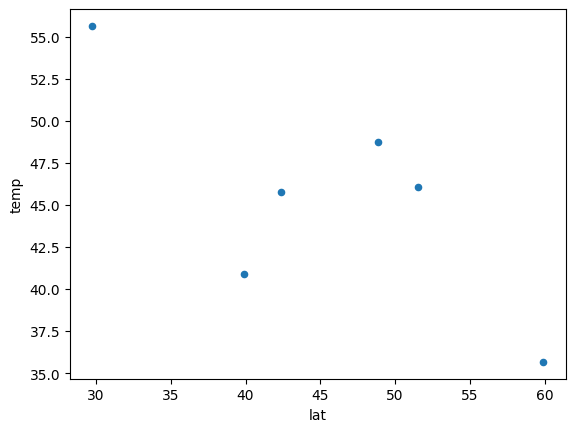

In [29]:
weather_data.plot(x="lat", y="temp", kind="scatter")

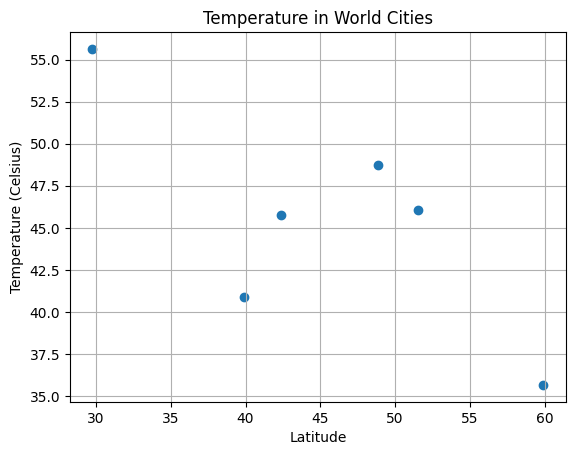

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

# ==========================================

### 2.06 Students Do: TV Ratings DataFrame (10 min)

# TV Ratings

In this activity, you will create an application that reads in a list of TV shows, makes multiple requests from an API to retrieve rating information, creates a Pandas DataFrame, and then visually displays the data.

## Instructions

* You may use the list of TV shows provided in the starter file or create your own.

* Request information on each TV show from the [TVmaze API's Show Search endpoint](https://www.tvmaze.com/api#show-search)

* Store the name and rating information into lists.

* Store this data in a dictionary, and use it to create a Pandas DataFrame.

* Use Pandas to create a bar chart comparing the ratings of each show.

---

In [24]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# list of tv show titles to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash",
            "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]

# tv maze show search base url
base_url = "http://api.tvmaze.com/search/shows?q="

# set up lists to hold response data for name and rating
titles = []
ratings = []
networks = []

# loop through tv show titles, make requests and parse
for show in tv_shows:
    target_url = base_url + show
    response = requests.get(target_url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])

In [26]:
# create dataframe
shows_df = pd.DataFrame({
    "title": titles,
    "rating": ratings
})

shows_df

,title,rating
0,Altered Carbon,8.0
1,Grey's Anatomy,7.7
2,This Is Us,7.9
3,The Flash,7.7
4,Vikings,8.6
5,Shameless,8.5
6,Arrow,7.4
7,Peaky Blinders,8.5
8,Dirk Gently,7.4


<AxesSubplot:xlabel='title'>

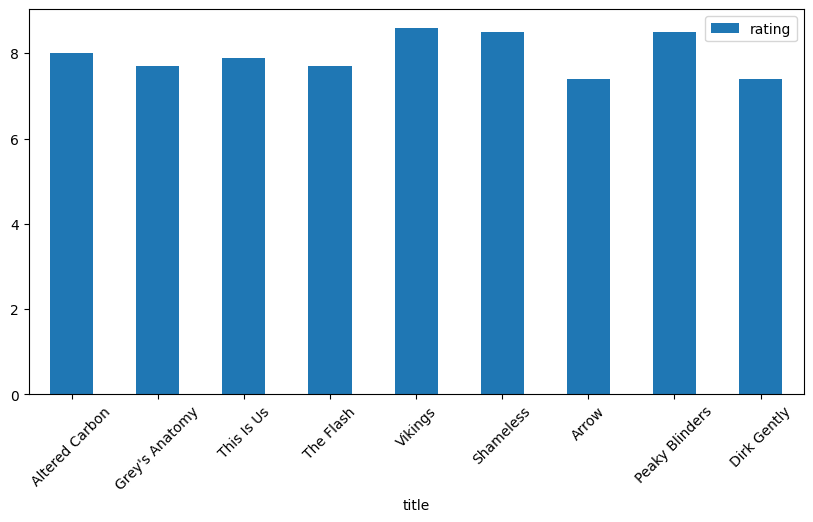

In [27]:
shows_df.plot(x='title', y='rating', kind='bar', figsize=(10,5), rot=45)

<AxesSubplot:xlabel='title'>

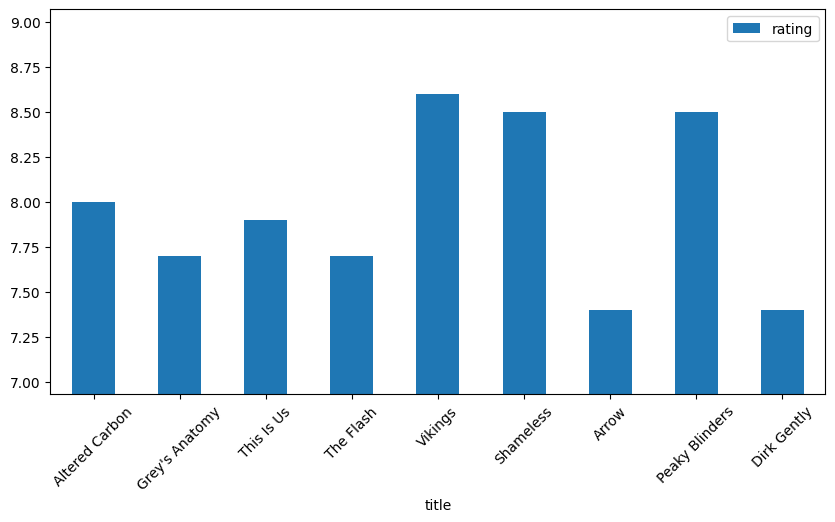

In [28]:
st = shows_df["rating"].std()
shows_df.plot(x='title', y='rating', kind='bar', figsize=(10,5), rot=45, ylim=(shows_df["rating"].min()-st, shows_df["rating"].max()+st))

# ==========================================

### 2.07 Students Do: Weather Statistics (12 min)

# Weather Statistics

In this activity, you will perform a linear regression on weather data from select cities in the Northern Hemisphere, and you will use the results to predict the temperature in Florence, Italy.

## Instructions

* Using the starter file as a guide, complete the following steps:

  * Create a scatter plot of Temperature vs. Latitude.

  * Perform linear regression.

  * Create a line equation for the regression.

  * Create a scatter plot with the linear regression line.

  * Predict the temperature of Florence, which is at latitude 43.77&deg;.

  * Use the API to determine the actual temperature in Florence.

## Bonus

If you finish early, feel free to try to predict the temperatures of other cities.

## Hint

If you need help, revisit the material on statistics from Unit 5.

---

In [30]:
# pip install scipy

In [31]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
# from config import weather_api_key


In [32]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")


In [33]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [34]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [9.64, 7.73, 2.82, 4.94, 23.99, 29.34, 11.58, 10.33, 7.97, 27.2]


In [35]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,9.64
1,London,51.5085,7.73
2,Oslo,59.9127,2.82
3,Beijing,39.9075,4.94
4,Mumbai,19.0144,23.99
5,Manila,14.6042,29.34
6,New York,40.7143,11.58
7,Seattle,47.6062,10.33
8,Dallas,32.7668,7.97
9,Taipei,25.0478,27.20


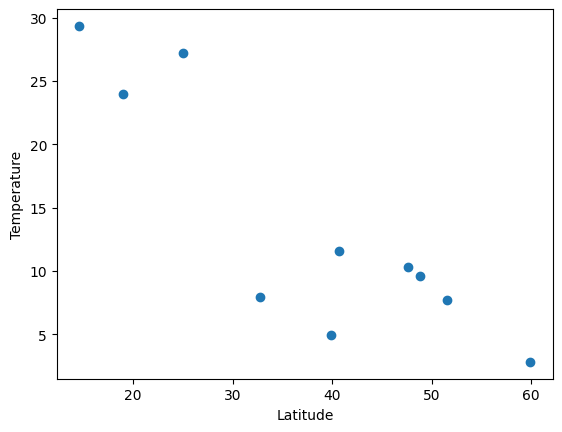

In [36]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [37]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     7.409302
1     5.906994
2     1.151734
3    12.471067
4    24.292791
5    26.788168
6    12.014563
7     8.114992
8    16.511414
9    20.878975
Name: lat, dtype: float64


In [38]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.57x +35.05


The r-squared is: 0.7677483242813813


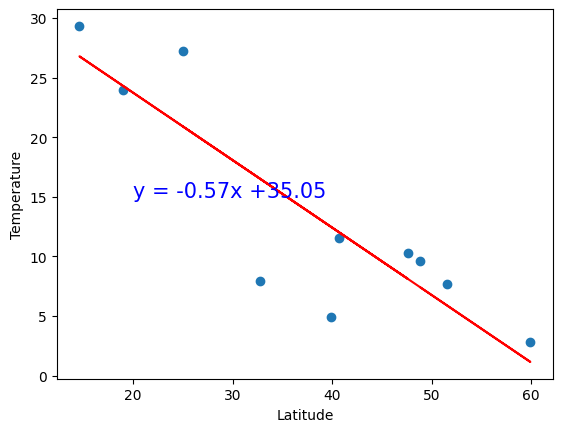

In [40]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="blue")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [41]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 10.29.


In [42]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 5.94


In [46]:
# print(rvalue, pvalue, stderr)

# ==========================================

# Break (10 mins)

# ==========================================

### 2.08 Instructor Do: Exception Handling (5 min)

### Exception

In [44]:
students = {
    # Name  : Age
    "James": 27,
    "Sarah": 19,
    "Jocelyn": 28
}

print(students["Mary"])

print("This line will never print.")

KeyError: 'Mary'

In [48]:
import sys
try:
    print(students["James"])
    a = 1
    b = 0
    d = a / b
except KeyError:
    print("we have KeyError")
except ZeroDivisionError:
    print("we have ZeroDivisionError")
except ZeroDivisionError:
    print("we have ZeroDivisionError")
finally:
    print("Anyway")

27
we have ZeroDivisionError
Anyway


### ExceptionHandling

In [50]:
students = {
    # Name  : Age
    "James": 27,
    "Sarah": 19,
    "Jocelyn": 28
}

# Try to access key that doesn't exist
try:
    students["Mary"]
except KeyError:
    print("Oops, that key doesn't exist.")
except TypeError:
    print("Oops, you write a typo AGAIN :).")
except (RuntimeError, NameError):
    print("Oops, that key doesn't exist.")
except:
    print(f"Unexpected error: {sys.exc_info()}")
finally:
    print('This line will be printed anyway!')
    print('------------------')
# "Catching" the error lets the rest of our code execute
print("...But the program doesn't die early!")

Unexpected error: (<class 'KeyError'>, KeyError('Mary'), <traceback object at 0x00000275DF2C2708>)
This line will be printed anyway!
------------------
...But the program doesn't die early!


# ==========================================

### 2.09 Students Do: Making Exceptions (5 min)

# Making Exceptions

In this activity, you will create an application that uses `try` and `except` to resolve a number of errors.

## Instructions

* Without removing any of the lines from the provided starter code, create try-except blocks that will allow the application to run without terminating.

* Each `except` block should handle the specific error that will occur.

* Add a `print` statement under the `except` block to log the error.

---

In [43]:
# Your assignment is to get the last line to print without changing any
# of the code below. Instead, wrap each line that throws an error in a
# try/exept block.

try:
    print("Infinity looks like + " + str(10 / 0) + ".")
except ZeroDivisionError:
    print("Woops. Can't do that.")

try:
    print("I think her name was + " + name + "?")
except NameError:
    print("Oh, I forgot to define 'name'. D'oh.")

try:
    print("Your name is a nonsense number. Look: " + int("Gabriel"))
except ValueError:
    print("Drat. 'Gabriel' isn't a number?")

print("I made it through the gauntlet. The message survived!")

Woops. Can't do that.
Oh, I forgot to define 'name'. D'oh.
Drat. 'Gabriel' isn't a number?
I made it through the gauntlet. The message survived!


In [ ]:
# Your assignment is to get the last line to print without changing any
# of the code below. Instead, wrap each line that throws an error in a
# try/except block.

print("Infinity looks like + " + str(10 / 0) + ".")

print("I think her name was + " + name + "?")

print("Your name is a nonsense number. Look: " + int("Gabriel"))

print("You made it through the gauntlet--the message survived!")

# ==========================================

### 2.10 Student Do: API Call Exceptions (12 min)

Not every call placed to an API will return a result. In this activity, you will use try/except to handle errors from API calls.

### Instructions

* Loop through the characters in the list and send a request to the Star Wars API.

* Create a try clause and an except clause. In the try clause, append the height, mass and character that is available in the Star Wars API. If the character is not available in the Star Wars API, use the except clause to print a message and `pass`.

* Create a DataFrame from the results.

* Drop any rows with null values to remove characters not in the Star Wars universe.

In [54]:
import json
import requests
import pandas as pd

In [56]:
url = 'https://swapi.dev/api/people/?search=R2-D2'
response_json = requests.get(url).json()
all_res = {
    'name': response_json['results'][0]['name'],
    'height': response_json['results'][0]['height'],
    'mass': response_json['results'][0]['mass']
}
all_res

In [66]:
# list(response_json['results'][0].keys())

{'name': 'R2-D2', 'height': '96', 'mass': '32'}

In [68]:
# List of character
search_characters = ['R2-D2', 'Darth Vader', 'Godzilla', 'Luke Skywalker', 'Frodo', \
              'Boba Fett', 'Iron Man', 'Jon Snow', 'Han Solo']

# Set url for API
url = 'https://swapi.dev/api/people/?search='

# Set empty lists to hold characters height and mass
height = []
mass = []
starwars_characters = []
all_data = []

# Loop through each character
for character in search_characters:
    
    # Create search query, make request and store in json
    response_json = requests.get(url + character).json()
    
    # Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        all_res = {
            'name': response_json['results'][0]['name'],
            'height': response_json['results'][0]['height'],
            'mass': response_json['results'][0]['mass']
        }
        all_data.append(all_res)
        height.append(response_json['results'][0]['height'])
        mass.append(response_json['results'][0]['mass'])
        starwars_characters.append(character)
        print(f"{character} found! Appending stats")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        err = sys.exc_info()
        print(f"Unexpected error: {str(err[0])} {str(err[1])}")
        print(f"Character {character} not found")
        pass

R2-D2 found! Appending stats
Darth Vader found! Appending stats
Unexpected error: <class 'IndexError'> list index out of range
Character Godzilla not found
Luke Skywalker found! Appending stats
Unexpected error: <class 'IndexError'> list index out of range
Character Frodo not found
Boba Fett found! Appending stats
Unexpected error: <class 'IndexError'> list index out of range
Character Iron Man not found
Unexpected error: <class 'IndexError'> list index out of range
Character Jon Snow not found
Han Solo found! Appending stats


In [71]:
df = pd.DataFrame(all_data)

In [73]:
df

,name,height,mass
0,R2-D2,96,32
1,Darth Vader,202,136
2,Luke Skywalker,172,77
3,Boba Fett,183,78.2
4,Han Solo,180,80


In [74]:
# Create DataFrame
character_height = pd.DataFrame({
    'character': starwars_characters,
    'height': height,
    'mass': mass
})
character_height

,character,height,mass
0,R2-D2,96,32
1,Darth Vader,202,136
2,Luke Skywalker,172,77
3,Boba Fett,183,78.2
4,Han Solo,180,80


# ==========================================

### 2.11 Instructor Do: World Bank API (5 min)

[World Bank API](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information)

In [75]:
# Dependencies
import requests

url = "http://api.worldbank.org/v2/"
api_format = "json"

# Get country information in JSON format
countries_response = requests.get(f"{url}countries?format={api_format}").json()

# First element is general information, second is countries themselves
countries = countries_response[1]

In [84]:
# countries_response[1]

In [85]:
# Report the names
for country in countries:
    print(country["name"])

Aruba
Africa Eastern and Southern
Afghanistan
Africa
Africa Western and Central
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
East Asia & Pacific (IBRD-only countries)
Europe & Central Asia (IBRD-only countries)
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
IBRD countries classified as high income
Bahrain
Bahamas, The
Bosnia and Herzegovina
Latin America & the Caribbean (IBRD-only countries)
Belarus
Belize
Middle East & North Africa (IBRD-only countries)
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Sub-Saharan Africa (IBRD-only countries)
Bhutan
Botswana
Sub-Saharan Africa (IFC classification)
Central African Republic
Canada
East Asia and the Pacific (IFC classification)
Central Europe and the Baltics
Europe and Central Asia (IFC classification)
Switzerland
Channel Islands
Chile


In [86]:
# Report the names
all = []
for country in countries:
    url = f"http://api.worldbank.org/v2/country/{country['iso2Code']}?format=json"
    print(country["name"])
    req = requests.get(url).json()[1][0]
#     print(req)
    dict_a = {
        "id": country['id'],
        "iso2Code": country['iso2Code'],
        "name": country['name'],
        "incomeLevel": req['incomeLevel']['value']
    }
    all.append(dict_a)
    print(url)

Aruba
http://api.worldbank.org/v2/country/AW?format=json
Africa Eastern and Southern
http://api.worldbank.org/v2/country/ZH?format=json
Afghanistan
http://api.worldbank.org/v2/country/AF?format=json
Africa
http://api.worldbank.org/v2/country/A9?format=json
Africa Western and Central
http://api.worldbank.org/v2/country/ZI?format=json
Angola
http://api.worldbank.org/v2/country/AO?format=json
Albania
http://api.worldbank.org/v2/country/AL?format=json
Andorra
http://api.worldbank.org/v2/country/AD?format=json
Arab World
http://api.worldbank.org/v2/country/1A?format=json
United Arab Emirates
http://api.worldbank.org/v2/country/AE?format=json
Argentina
http://api.worldbank.org/v2/country/AR?format=json
Armenia
http://api.worldbank.org/v2/country/AM?format=json
American Samoa
http://api.worldbank.org/v2/country/AS?format=json
Antigua and Barbuda
http://api.worldbank.org/v2/country/AG?format=json
Australia
http://api.worldbank.org/v2/country/AU?format=json
Austria
http://api.worldbank.org/v2/c

In [89]:
df = pd.DataFrame(all)
df.head()

,id,iso2Code,name,incomeLevel
0,ABW,AW,Aruba,High income
1,AFE,ZH,Africa Eastern and Southern,Aggregates
2,AFG,AF,Afghanistan,Low income
3,AFR,A9,Africa,Aggregates
4,AFW,ZI,Africa Western and Central,Aggregates


In [ ]:
df["incomeLevel"].value_counts()

# ==========================================

### 2.12 Partners Do: Two Calls (10 min)

[World Bank API](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information)

# Lending Types

In this activity, you’ll practice making two API calls in sequence. The second API call will depend on the response from the first.

## Instructions

* Retrieve a list of the lending types that the world bank keeps track of, and extract the ID key for each one.

* Next, determine how many countries are categorized under each lending type. Use a dictionary to store this information.

  * This data is stored as the first element of the response array.

* Finally, print the number of countries for each lending type.

---

In [90]:
# Dependencies
import requests
url = "http://api.worldbank.org/v2/"

In [92]:
# Get the list of lending types the world bank has
lending_response = requests.get(f"{url}lendingTypes?format=json").json()
lending_types = [lending_type["id"] for lending_type in lending_response[1]]

In [93]:
lending_types

['IBD', 'IDB', 'IDX', 'LNX']

In [94]:
# Next, determine how many countries fall into each lending type.
# Hint: Look at the first element of the response array.
country_count_by_type = {}
for lending_type in lending_types:
    query = f"{url}countries?lendingType={lending_type}&format=json"
    response = requests.get(query).json()
    country_count_by_type[lending_type] = response[0]["total"]

In [95]:
country_count_by_type

{'IBD': 140, 'IDB': 30, 'IDX': 118, 'LNX': 74}

In [96]:
# Print the number of countries of each lending type
for key, value in country_count_by_type.items():
    print(f"The number of countries with lending type {key} is {value}.")

The number of countries with lending type IBD is 140.
The number of countries with lending type IDB is 30.
The number of countries with lending type IDX is 118.
The number of countries with lending type LNX is 74.


In [97]:
# Get the list of lending types the world bank has
lending_response = requests.get(f"{url}lendingTypes?format=json").json()[1]
print(json.dumps(lending_response, indent=4))
lending_types = [x["id"] for x in lending_response]
lending_types

[
    {
        "id": "IBD",
        "iso2code": "XF",
        "value": "IBRD"
    },
    {
        "id": "IDB",
        "iso2code": "XH",
        "value": "Blend"
    },
    {
        "id": "IDX",
        "iso2code": "XI",
        "value": "IDA"
    },
    {
        "id": "LNX",
        "iso2code": "XX",
        "value": "Not classified"
    }
]


['IBD', 'IDB', 'IDX', 'LNX']

In [98]:
lendingtype = {}
for lend in lending_types:
    lendingtype[lend] = []
    url2 = f"http://api.worldbank.org/v2/country?lendingtype={lend}&format=json"
    response = requests.get(url2).json()[1]
    for country in response:
        lendingtype[lend].append(country["name"])

#     print(response[0]["name"])
for lend in lendingtype:
    print(lend, len(lendingtype[lend]))

IBD 50
IDB 30
IDX 50
LNX 50


In [103]:
lendingtype

{'IBD': ['Angola',
  'Angola',
  'Albania',
  'Albania',
  'Argentina',
  'Argentina',
  'Armenia',
  'Armenia',
  'Antigua and Barbuda',
  'Antigua and Barbuda',
  'Azerbaijan',
  'Azerbaijan',
  'Bulgaria',
  'Bulgaria',
  'Bosnia and Herzegovina',
  'Bosnia and Herzegovina',
  'Belarus',
  'Belarus',
  'Belize',
  'Belize',
  'Bolivia',
  'Bolivia',
  'Brazil',
  'Brazil',
  'Botswana',
  'Botswana',
  'Chile',
  'Chile',
  'China',
  'China',
  'Colombia',
  'Colombia',
  'Costa Rica',
  'Costa Rica',
  'Dominican Republic',
  'Dominican Republic',
  'Algeria',
  'Algeria',
  'Ecuador',
  'Ecuador',
  'Egypt, Arab Rep.',
  'Egypt, Arab Rep.',
  'Gabon',
  'Gabon',
  'Georgia',
  'Georgia',
  'Equatorial Guinea',
  'Equatorial Guinea',
  'Guatemala',
  'Guatemala'],
 'IDB': ['Cameroon',
  'Cameroon',
  'Congo, Rep.',
  'Congo, Rep.',
  'Cabo Verde',
  'Cabo Verde',
  'Dominica',
  'Dominica',
  'Fiji',
  'Fiji',
  'Grenada',
  'Grenada',
  'Kenya',
  'Kenya',
  'St. Lucia',
  'St. L

In [99]:
lending_types = [lending_type["id"] for lending_type in lending_response]
lending_types

['IBD', 'IDB', 'IDX', 'LNX']

In [100]:
# Next, determine how many countries fall into each lending type.
# Hint: Look at the first element of the response array.
country_count_by_type = {}
for lending_type in lending_types:
    query = f"{url}countries?lendingType={lending_type}&format=json"
    response = requests.get(query).json()
    country_count_by_type[lending_type] = response[0]["total"]
country_count_by_type

{'IBD': 140, 'IDB': 30, 'IDX': 118, 'LNX': 74}

In [101]:
for k, v in country_count_by_type.items():
    print(k, v)

IBD 140
IDB 30
IDX 118
LNX 74


In [102]:
# Print the number of countries of each lending type
for key, value in country_count_by_type.items():
    print(f"The number of countries with lending type {key} is {value}.")

The number of countries with lending type IBD is 140.
The number of countries with lending type IDB is 30.
The number of countries with lending type IDX is 118.
The number of countries with lending type LNX is 74.


# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "06-Python-APIs - Day 2 - Working with Weather & City APIs"
objectives = [
    "Familiarize yourselves with API documentation effectively",
    "Use data from the OpenWeatherMap and World Bank APIs",
    "Load JSON from API responses into a Pandas DataFrame",
    "Use try/except blocks to handle exceptions",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))